# **Insurance Claims Fraud Detection Logistic Regression Model**
**Tanzila Asim Zafar**

**24218**


**Importing Required Libraries**

In [128]:
# pandas for Data Preprocess
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# sklearn is a machine learning library that provides functions to build models
# StandardScaler is used to scale the data (important for KNN)
from sklearn.preprocessing import StandardScaler

# KNeighborsClassifier is the KNN model itself
from sklearn.neighbors import KNeighborsClassifier

# train_test_split is used to split the data into training and testing sets
from sklearn.model_selection import train_test_split # used to train the model

# Accuracy and other metrics to evaluate the model performance
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

from yellowbrick.classifier import ConfusionMatrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import LabelEncoder

**Data Preprocessing**

In [129]:
# Load Dataset
from google.colab import files
uploaded = files.upload()

import pandas as pd

df = pd.read_csv('insurance_claims.csv')

Saving insurance_claims.csv to insurance_claims (1).csv


In [132]:
# dimensions of dataset
df.shape

(10000, 26)

In [133]:
# first few rows of dataset
df.head()

,PolicyholderNumber,FirstPartyVehicleNumber,PolicyholderOccupation,FirstPolicySubscriptionDate,FirstPartyVehicleType,PolicyholderPostCode,PolicyWasSubscribedOnInternet,NumberOfPoliciesOfPolicyholder,FpVehicleAgeMonths,PolicyHolderAge,...,ClaimInvolvedCovers,DamageImportance,ConnectionBetweenParties,LossPostCode,EasinessToStage,ClaimWithoutIdentifiedThirdParty,ClaimAmount,LossHour,NumberOfBodilyInjuries,Fraud
0,PH006844,V89073,Lawyer,2014-02-16,Motorcycle,75165,0,2,76,31,...,Liability,5,No,81328,0.652447,0,37246.774861,17,0,0.0
1,PH004230,V64262,Teacher,2011-09-14,Car,45809,1,1,97,67,...,Collision,8,No,88724,0.676261,0,32925.571674,19,1,0.0
2,PH004845,V91142,Business,2015-10-11,Truck,42165,0,1,176,76,...,Comprehensive,1,No,68441,0.851770,0,5817.983955,22,0,0.0
3,PH004688,V37222,Engineer,2016-04-12,Car,82232,0,1,151,71,...,Liability,9,No,44767,0.926641,0,48698.053138,22,0,0.0
4,PH006863,V57210,Business,2012-06-27,SUV,85642,0,1,81,28,...,Liability,8,No,46852,0.353562,0,38666.693932,4,0,0.0


In [134]:
# finding datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 26 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   PolicyholderNumber                10000 non-null  object 
 1   FirstPartyVehicleNumber           10000 non-null  object 
 2   PolicyholderOccupation            10000 non-null  object 
 3   FirstPolicySubscriptionDate       10000 non-null  object 
 4   FirstPartyVehicleType             10000 non-null  object 
 5   PolicyholderPostCode              10000 non-null  int64  
 6   PolicyWasSubscribedOnInternet     10000 non-null  int64  
 7   NumberOfPoliciesOfPolicyholder    10000 non-null  int64  
 8   FpVehicleAgeMonths                10000 non-null  int64  
 9   PolicyHolderAge                   10000 non-null  int64  
 10  FirstPartyLiability               10000 non-null  float64
 11  ReferenceId                       10000 non-null  object 
 12  Third

In [135]:
# statistical details of data
df.describe()

,PolicyholderPostCode,PolicyWasSubscribedOnInternet,NumberOfPoliciesOfPolicyholder,FpVehicleAgeMonths,PolicyHolderAge,FirstPartyLiability,DamageImportance,LossPostCode,EasinessToStage,ClaimWithoutIdentifiedThirdParty,ClaimAmount,LossHour,NumberOfBodilyInjuries,Fraud
count,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,55160.097100,0.29040,1.596800,120.534600,48.520900,0.499122,4.942900,55240.468000,0.497711,0.149500,25208.259731,11.529500,0.399600,0.010000
std,26257.617614,0.45397,0.857265,69.264548,17.764237,0.229996,2.595518,26134.259058,0.289893,0.356598,14251.494093,6.907699,0.809929,0.099504
min,10010.000000,0.00000,1.000000,1.000000,18.000000,0.100037,1.000000,10000.000000,0.000243,0.000000,509.943433,0.000000,0.000000,0.000000
25%,31798.250000,0.00000,1.000000,60.000000,33.000000,0.302596,3.000000,32724.750000,0.246545,0.000000,12899.706361,6.000000,0.000000,0.000000
50%,55844.000000,0.00000,1.000000,120.000000,49.000000,0.498444,5.000000,55375.000000,0.494026,0.000000,25112.443702,12.000000,0.000000,0.000000
75%,78056.250000,1.00000,2.000000,181.000000,64.000000,0.699865,7.000000,77970.750000,0.747446,0.000000,37717.133789,18.000000,1.000000,0.000000
max,99998.000000,1.00000,4.000000,239.000000,79.000000,0.899952,9.000000,99997.000000,0.999917,1.000000,49994.340283,23.000000,4.000000,1.000000


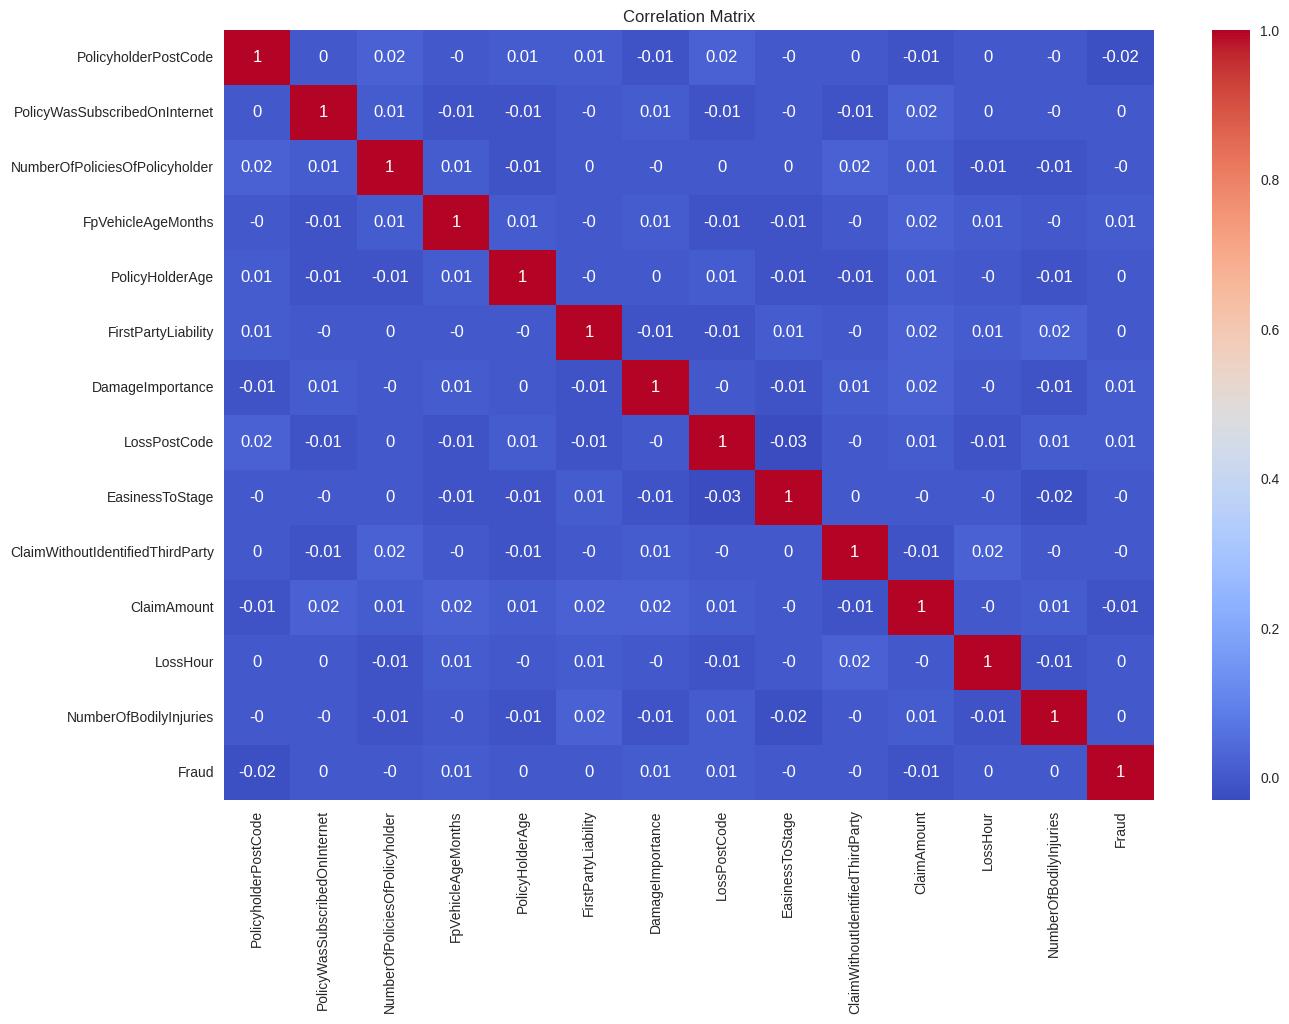

In [136]:
# Finding correlations
# Select only numeric columns for correlation
numeric_data = df.select_dtypes(include=[np.number])

# Calculate the correlation matrix
corr = numeric_data.corr().round(2)

# Plot the heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


Observations:

* Low correlation with Fraud

No features stand out as strongly predictive of fraud on their own.
This suggests that fraud detection will rely on a combination of multiple features rather than a single indicator.




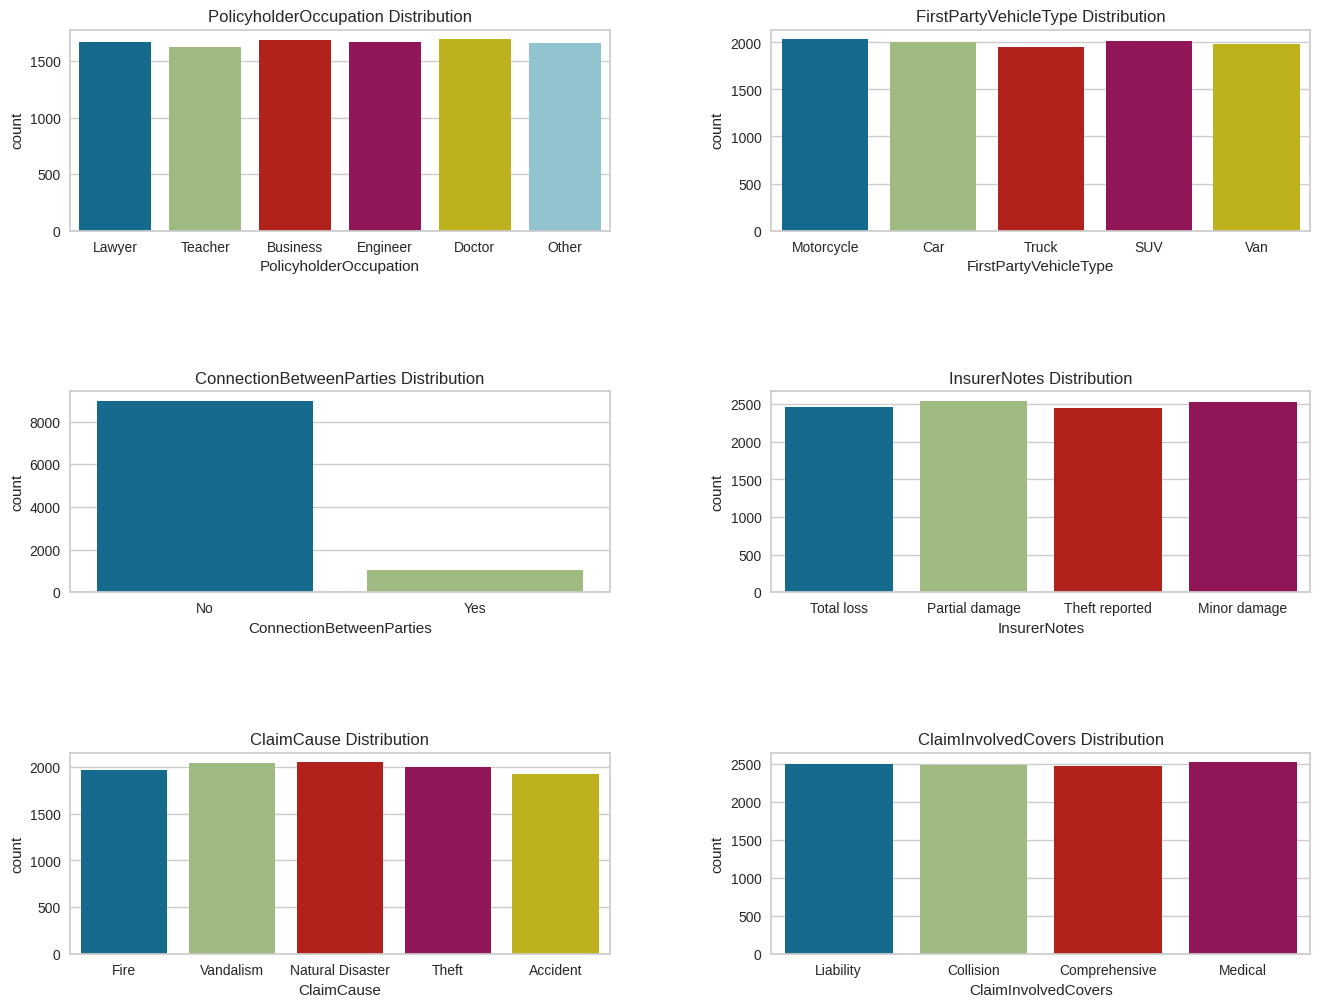

In [137]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of categorical variables (Ensure these columns exist in df)
categorical_cols = [
    "PolicyholderOccupation", "FirstPartyVehicleType", "ClaimType",
    "ConnectionBetweenParties", "InsurerNotes", "ClaimCause",
    "ClaimInvolvedCovers"
]

# Check which columns actually exist in df
available_cats = [col for col in categorical_cols if col in df.columns]

# Define grid size: 2 plots per row
rows = (len(available_cats) + 1) // 2
plt.figure(figsize=(16, rows * 4))  # Adjust figure size dynamically

# Generate countplots
for i, col in enumerate(available_cats, 1):
    plt.subplot(rows, 2, i)  # 2 columns per row
    sns.countplot(data=df, x=col, hue=col, legend=False)  # Improved visualization
    plt.title(f"{col} Distribution")

# Adjust layout for better spacing
plt.subplots_adjust(hspace=0.8, wspace=0.3)
plt.show()


#the for loop code used to make subplots is taken from chat gpt

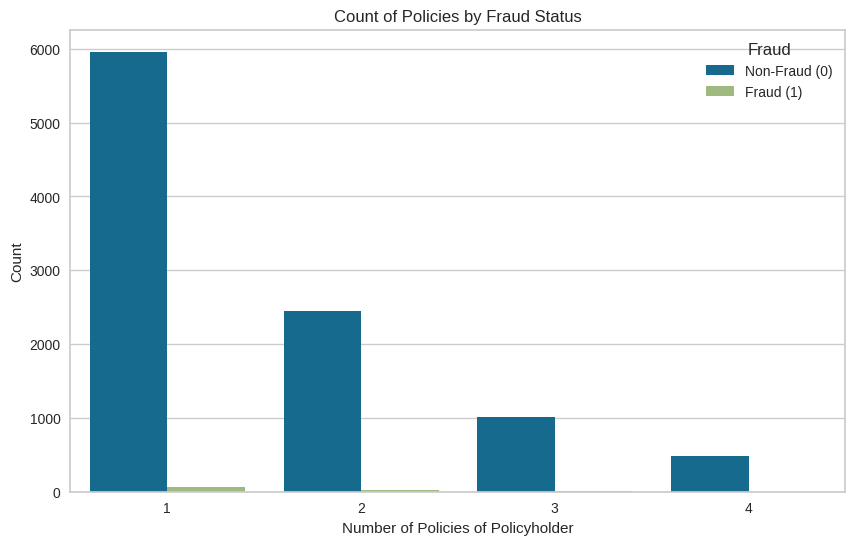

In [150]:
#countplot of fraud again no of policies of policyholder
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x="NumberOfPoliciesOfPolicyholder", hue="Fraud")
plt.title("Count of Policies by Fraud Status")
plt.xlabel("Number of Policies of Policyholder")
plt.ylabel("Count")
plt.legend(title="Fraud", labels=["Non-Fraud (0)", "Fraud (1)"])
plt.show()


Fraud is observed in cases where policy holder only has 1 or 2 policies

In [151]:
# Drop irrelevant columns
columns_to_drop = ["PolicyholderNumber", "FirstPartyVehicleNumber", "ReferenceId", "ThirdPartyVehicleNumber","PolicyholderPostCode"]
df_cleaned = df.drop(columns=columns_to_drop)

In [152]:
# Convert date columns to datetime format
df_cleaned["FirstPolicySubscriptionDate"] = pd.to_datetime(df_cleaned["FirstPolicySubscriptionDate"])
df_cleaned["LossDate"] = pd.to_datetime(df_cleaned["LossDate"])


**Feature Engineering**

In [182]:
# Feature Engineering - Time-based features
df_cleaned["policy_tenure_days"] = (df_cleaned["LossDate"] - df_cleaned["FirstPolicySubscriptionDate"]).dt.days
df_cleaned["loss_year"] = df_cleaned["LossDate"].dt.year
df_cleaned["loss_month"] = df_cleaned["LossDate"].dt.month
df_cleaned["loss_day"] = df_cleaned["LossDate"].dt.day
df_cleaned["loss_hour"] = df_cleaned["LossDate"].dt.hour

In [184]:
#Drop original date columns
df_cleaned = df_cleaned.drop(columns=["FirstPolicySubscriptionDate", "LossDate"])

In [185]:
# Check for missing values
missing_values = df_cleaned.isnull().sum()
print("Missing Values:\n", missing_values[missing_values > 0])

Missing Values:
 Series([], dtype: int64)


**One-Hot Encoding**

In [186]:
# Encode categorical variables
categorical_cols = df_cleaned.select_dtypes(include=['object']).columns
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df_cleaned[col] = le.fit_transform(df_cleaned[col])
    label_encoders[col] = le  # Store encoders for reference

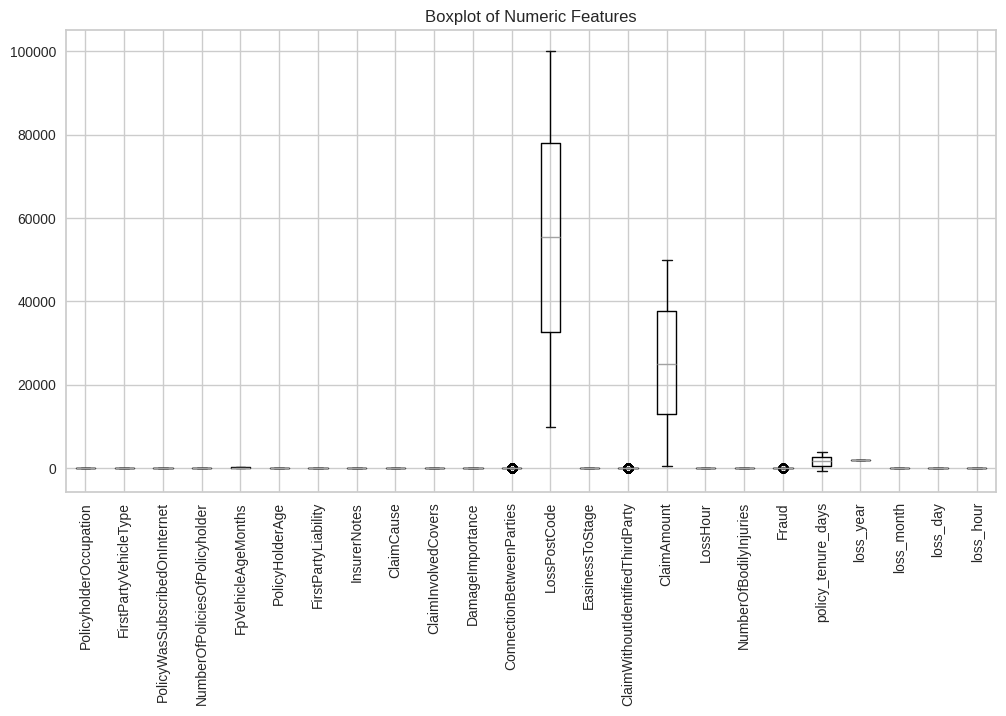

In [187]:
# Check for outliers using boxplots
plt.figure(figsize=(12, 6))
df_cleaned.boxplot(rot=90)
plt.title("Boxplot of Numeric Features")
plt.show()

In [188]:
# Detect outliers using IQR
Q1 = df_cleaned.quantile(0.25)
Q3 = df_cleaned.quantile(0.75)
IQR = Q3 - Q1
outliers = ((df_cleaned < (Q1 - 1.5 * IQR)) | (df_cleaned > (Q3 + 1.5 * IQR))).sum()
print("Outlier Counts:\n", outliers[outliers > 0])

Outlier Counts:
 ConnectionBetweenParties            1025
ClaimWithoutIdentifiedThirdParty    1495
Fraud                                100
dtype: int64


In [190]:
# Log transformation helps reduce the effect of extreme values by compressing the range of the data.
# It is particularly useful when dealing with skewed distributions.

# Apply log transformation to features with outliers (EXCLUDING 'Fraud')
outlier_cols = outliers[outliers > 0].index
outlier_cols = outlier_cols.difference(["Fraud"])  # Exclude Fraud from log transformation
df_cleaned[outlier_cols] = df_cleaned[outlier_cols].apply(lambda x: np.log1p(x))


In [191]:
df_cleaned.count()

,0
PolicyholderOccupation,10000
FirstPartyVehicleType,10000
PolicyWasSubscribedOnInternet,10000
NumberOfPoliciesOfPolicyholder,10000
FpVehicleAgeMonths,10000
PolicyHolderAge,10000
FirstPartyLiability,10000
InsurerNotes,10000
ClaimCause,10000
ClaimInvolvedCovers,10000


In [192]:
# finding datatypes
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 24 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   PolicyholderOccupation            10000 non-null  int64  
 1   FirstPartyVehicleType             10000 non-null  int64  
 2   PolicyWasSubscribedOnInternet     10000 non-null  int64  
 3   NumberOfPoliciesOfPolicyholder    10000 non-null  float64
 4   FpVehicleAgeMonths                10000 non-null  int64  
 5   PolicyHolderAge                   10000 non-null  int64  
 6   FirstPartyLiability               10000 non-null  float64
 7   InsurerNotes                      10000 non-null  int64  
 8   ClaimCause                        10000 non-null  int64  
 9   ClaimInvolvedCovers               10000 non-null  int64  
 10  DamageImportance                  10000 non-null  int64  
 11  ConnectionBetweenParties          10000 non-null  float64
 12  LossP

In [193]:
df_cleaned["Fraud"] = df_cleaned["Fraud"].astype(int)

In [194]:
# Define features (X) and target (y)
X = df_cleaned.drop(columns=["Fraud"])
y = df_cleaned["Fraud"]
df_cleaned["Fraud"] = df_cleaned["Fraud"].astype(int)


In [195]:
print(y.value_counts(normalize=True))  # Check fraud percentage before splitting
print(df_cleaned["Fraud"].value_counts())  # Check if fraud cases exist
df_cleaned["Fraud"] = df["Fraud"]  # Restore original Fraud values


Fraud
0    0.99
1    0.01
Name: proportion, dtype: float64
Fraud
0    9900
1     100
Name: count, dtype: int64


In [196]:
df_cleaned["Fraud"].value_counts()

,count
Fraud,
0.0,9900
1.0,100


In [197]:
#fraud cases were not being included in the training dataset through random sampling that is why we are manually including them
#use of generative ai for the following code

# Separate fraud and non-fraud cases
df_fraud = df_cleaned[df_cleaned["Fraud"] == 1]
df_non_fraud = df_cleaned[df_cleaned["Fraud"] == 0]

# Split non-fraud cases normally
X_train_nonfraud, X_test_nonfraud, y_train_nonfraud, y_test_nonfraud = train_test_split(
    df_non_fraud.drop(columns=["Fraud"]), df_non_fraud["Fraud"], test_size=0.2, random_state=42
)

# Split fraud cases separately (to ensure some fraud cases are in training set)
X_train_fraud, X_test_fraud, y_train_fraud, y_test_fraud = train_test_split(
    df_fraud.drop(columns=["Fraud"]), df_fraud["Fraud"], test_size=0.2, random_state=42
)

# Combine them back
X_train = pd.concat([X_train_nonfraud, X_train_fraud])
X_test = pd.concat([X_test_nonfraud, X_test_fraud])
y_train = pd.concat([y_train_nonfraud, y_train_fraud])
y_test = pd.concat([y_test_nonfraud, y_test_fraud])

# Verify fraud counts
print("Training set:")
print(y_train.value_counts())

print("\nTest set:")
print(y_test.value_counts())


Training set:
Fraud
0.0    7920
1.0      80
Name: count, dtype: int64

Test set:
Fraud
0.0    1980
1.0      20
Name: count, dtype: int64


**Using SMOTE to handle class imbalance**

In [198]:
#the % of fraudlent claims in the data is only 1% so we will apply smote for oversampling the minority class (fraud cases)



# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Apply SMOTE for oversampling
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)


In [204]:
# Feature Scaling
scaler = StandardScaler()
X_train_resampled = scaler.fit_transform(X_train_resampled)
X_test = scaler.transform(X_test)

#use of generative ai

**Train Logistic Regression Model**

In [200]:
# Train logistic regression model
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(random_state=42, max_iter=500,class_weight='balanced')
log_reg.fit(X_train_resampled, y_train_resampled)


LogisticRegression(class_weight='balanced', max_iter=500, random_state=42)

In [201]:
# Predictions
y_pred = log_reg.predict(X_test)
y_pred_prob = log_reg.predict_proba(X_test)[:, 1]

In [202]:
# Model Evaluation
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_prob)
conf_matrix = confusion_matrix(y_test, y_pred)

# Print evaluation metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"AUC-ROC: {roc_auc:.4f}")
print("Confusion Matrix:")
print(conf_matrix)

Accuracy: 0.7105
Precision: 0.0139
Recall: 0.4000
F1 Score: 0.0269
AUC-ROC: 0.5805
Confusion Matrix:
[[1413  567]
 [  12    8]]


1. Accuracy: 71.05%
The model correctly predicts 71.05% of all cases.
However, accuracy is not always a good metric for imbalanced datasets like yours, where fraud cases are only 1% of the data.
2. Precision: 1.39%
Precision = TP / (TP + FP)
A very low precision (1.39%) means that most of the cases the model classified as fraud were actually not fraud (high false positives).
This suggests the model struggles with differentiating between fraud and non-fraud claims.
3. Recall: 40.00%
Recall = TP / (TP + FN)
A recall of 40% means the model correctly identifies 40% of actual fraud cases.
While this is an improvement compared to precision, it indicates the model still misses 60% of actual fraud cases.
For fraud detection, recall is usually more important because missing fraud cases (false negatives) can have significant financial implications.
4. F1 Score: 2.69%
The F1 score is a balance between precision and recall.
A very low F1 score (2.69%) indicates that both precision and recall are low, meaning the model is not performing well overall in detecting fraud.
5. AUC-ROC: 0.5805
AUC-ROC (Area Under the Curve - Receiver Operating Characteristic) measures how well the model distinguishes between fraud and non-fraud cases.
A score of 0.58 is slightly better than random guessing (0.50) but still poor—ideally, it should be above 0.80 for a good fraud detection model.

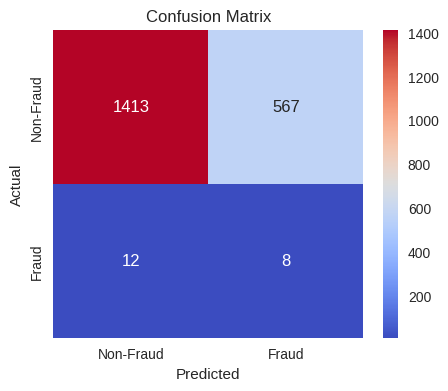

In [203]:
# Visualize confusion matrix
plt.figure(figsize=(5, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='coolwarm', xticklabels=["Non-Fraud", "Fraud"],
yticklabels=["Non-Fraud", "Fraud"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

567 False Positives: The model wrongly classified 567 legitimate claims as fraud—this could cause unnecessary investigations.
12 False Negatives: The model missed 12 actual fraud cases, which is a problem in fraud detection.


**Ways to Improve Fraud Detection**
Improve Data Preprocessing & Feature Engineering

Generate new features: Create additional fraud-related features, such as claim amount anomalies, policyholder behavior patterns, and historical fraud trends.
Use domain knowledge: Identify suspicious claim characteristics based on real-world fraud cases.
Handle Class Imbalance Better

Use ensemble models: Random Forest, XGBoost, or LightGBM often perform better than logistic regression in detecting rare events.
Use anomaly detection techniques: Implement autoencoders, one-class SVM, or Isolation Forests to detect unusual claim patterns.
Tune Hyperparameters More Carefully

Adjust regularization strength (C) and class weight balance to improve fraud detection without overfitting.
Use Bayesian Optimization or Random Search instead of GridSearchCV for better hyperparameter tuning.
Use More Data

If possible, get more labeled fraud cases to improve model learning.
Use external fraud databases or historical claim data to enrich training samples.